In [1]:
import pandas as pd
import matplotlib.pyplot as plt

resultsdf = pd.read_csv('http://infs3080-class.uccs.edu/pydev/dataFiles/OLYMPICS/summer.csv')

In [2]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


# Matplotlib Examples

## Calculate the number of medals won by Country

In [4]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
MKD       1
SUD       1
MRI       1
NIG       1
GUY       1
Name: Medal, Length: 147, dtype: int64

## Visualize the data

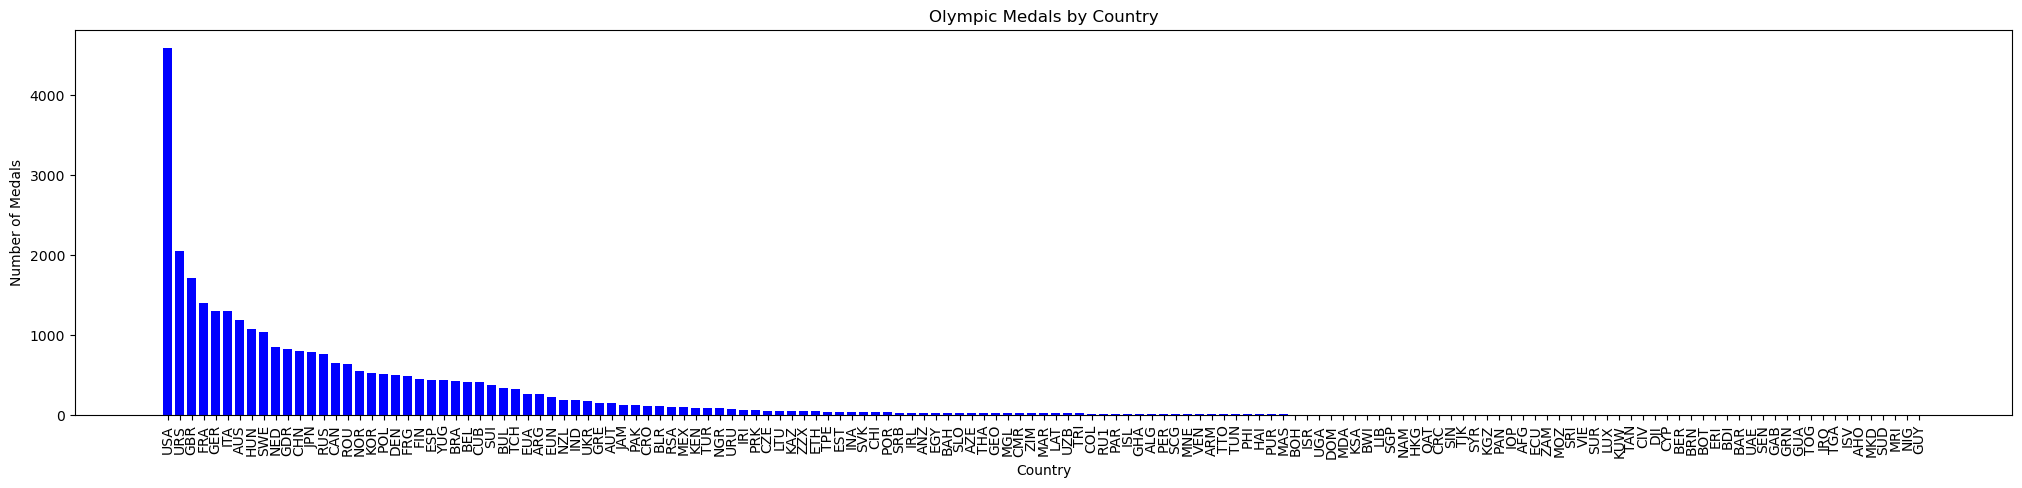

In [9]:
# Setup the size of the chart
plt.figure(figsize=(25, 5))


# Format the chart
plt.bar(medalsCountry.index, medalsCountry.values, color='blue')
plt.title('Olympic Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

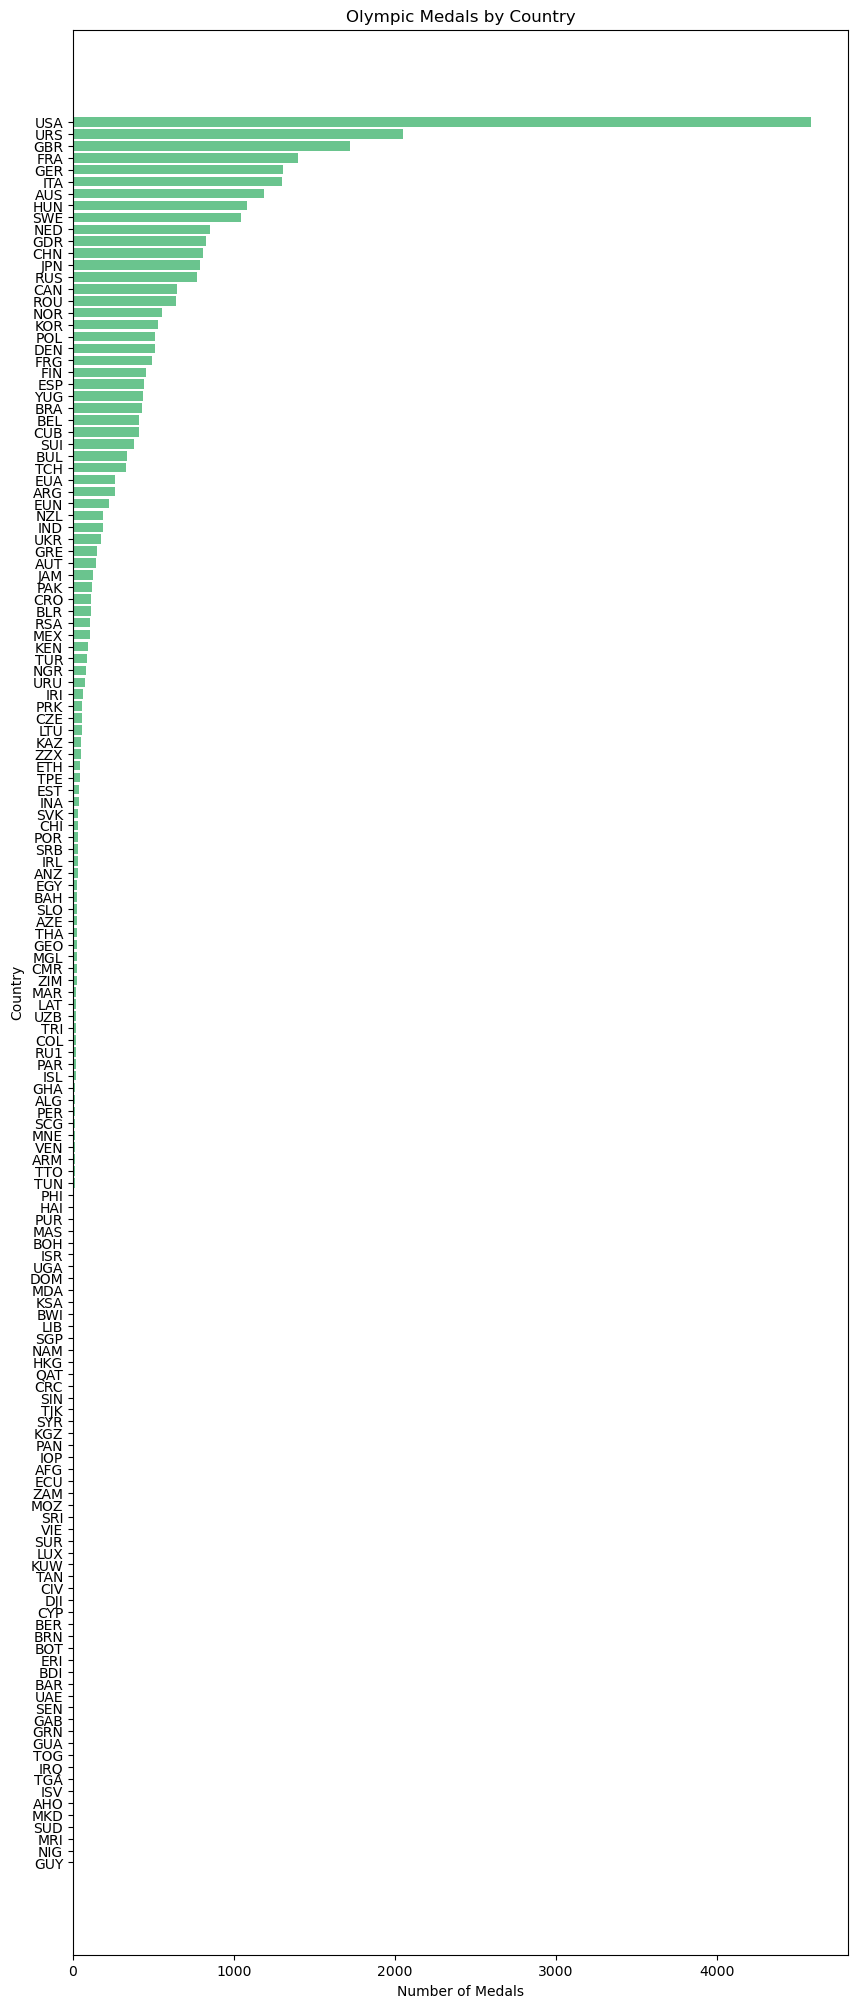

In [11]:
#Format the chart size
plt.figure(figsize=(10,25))

# Format the chart
plt.barh(medalsCountry.index, medalsCountry.values, color='#6ac48e')
plt.title('Olympic Medals by Country')
plt.xlabel('Number of Medals')
plt.ylabel('Country')

# Invert the axis to show the highest number of medals at the top
plt.gca().invert_yaxis()

plt.show()

## Pie Chart example

Medals won by the USA by Type (Gold, Silver, Bronze)

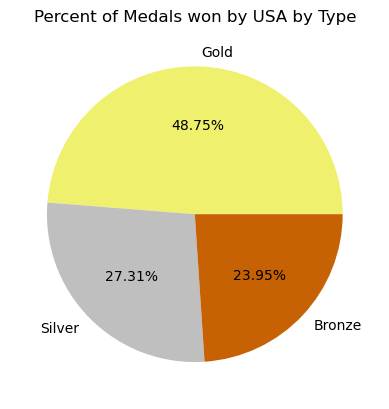

In [14]:
# Filter the data to only see US medals
usResults = resultsdf[resultsdf['Country'] == 'USA']

# Calculate the number of Gold, Silver, and Bronze medals
medalCounts = usResults['Medal'].value_counts()

# Define custom colors for our chart
colors = ['#eef06e', '#bfbfbf', '#c76204']

# Create Pie chart
plt.pie(medalCounts.values, labels=medalCounts.index, autopct='%1.2f%%', colors=colors)

# Add a title
plt.title('Percent of Medals won by USA by Type')

plt.show()

## Line chart example

Display USA Gold Medals by Year

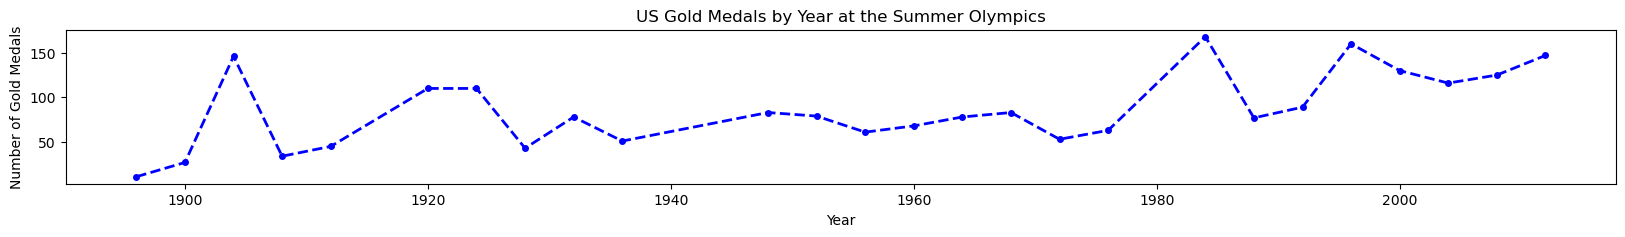

In [21]:
# Filter the data
usGold = resultsdf[(resultsdf.Country == 'USA') & (resultsdf.Medal == 'Gold')]

# Group the data
usGoldYr = usGold.groupby('Year')['Medal'].count()

# Create the chart
plt.figure(figsize=(20,2))

# Design our line
plt.plot(usGoldYr.index, usGoldYr.values, color='b', linestyle='--', marker='.', linewidth=2, markersize=8)

plt.title('US Gold Medals by Year at the Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.show()

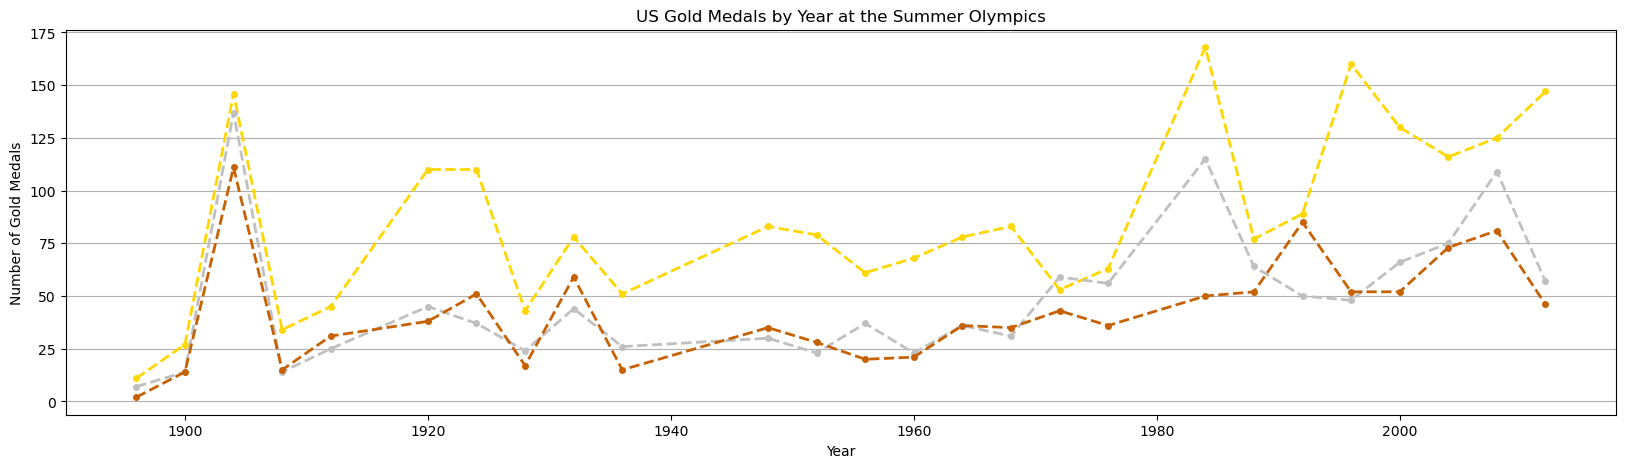

In [28]:
# Filter the data
usGold = resultsdf[(resultsdf.Country == 'USA') & (resultsdf.Medal == 'Gold')]
usSilver = resultsdf[(resultsdf.Country == 'USA') & (resultsdf.Medal == 'Silver')]
usBronze = resultsdf[(resultsdf.Country == 'USA') & (resultsdf.Medal == 'Bronze')]

# Group the data
usGoldYr = usGold.groupby('Year')['Medal'].count()
usSilverYr = usSilver.groupby('Year')['Medal'].count()
usBronzeYr = usBronze.groupby('Year')['Medal'].count()

# Create the chart
plt.figure(figsize=(20,5))

# Design our line
plt.plot(usGoldYr.index, usGoldYr.values, color='gold', linestyle='--', marker='.', linewidth=2, markersize=8, label='Gold')
plt.plot(usSilverYr.index, usSilverYr.values, color='silver', linestyle='--', marker='.', linewidth=2, markersize=8, label='Silver')
plt.plot(usBronzeYr.index, usBronzeYr.values, color='#c76204', linestyle='--', marker='.', linewidth=2, markersize=8, label='Bronze')

plt.title('US Gold Medals by Year at the Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.grid(axis='y')
# plt.grid(axis='x')
plt.show()

## Scatterplot

Medals by Country

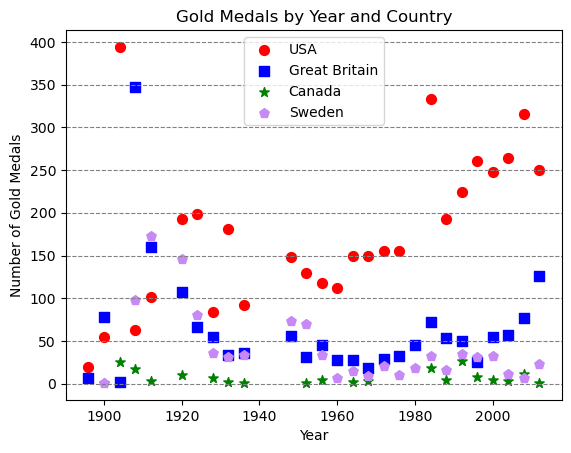

In [30]:
# Let's compare Countries
medalsGold = resultsdf[(resultsdf.Country == 'USA') |
                       (resultsdf.Country == 'SWE') |
                       (resultsdf.Country == 'GBR') |
                       (resultsdf.Country == 'CAN') &
                       (resultsdf.Medal == 'Gold')]

# Group the data
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group by Year and Country
medalsYrCountry = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot to show Gold Medals by Country
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create a scatter plot
plt.scatter(medalsPivot.index, medalsPivot['USA'], label='USA', color='red', marker='o', s=50)
plt.scatter(medalsPivot.index, medalsPivot['GBR'], label='Great Britain', color='blue', marker='s', s=50)
plt.scatter(medalsPivot.index, medalsPivot['CAN'], label='Canada', color='green', marker='*', s=50)
plt.scatter(medalsPivot.index, medalsPivot['SWE'], label='Sweden', color='#c689f5', marker='p', s=50)


# Style the scatter plot
plt.title('Gold Medals by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', color='gray')

# Seaborn Examples

In [31]:
import seaborn as sns

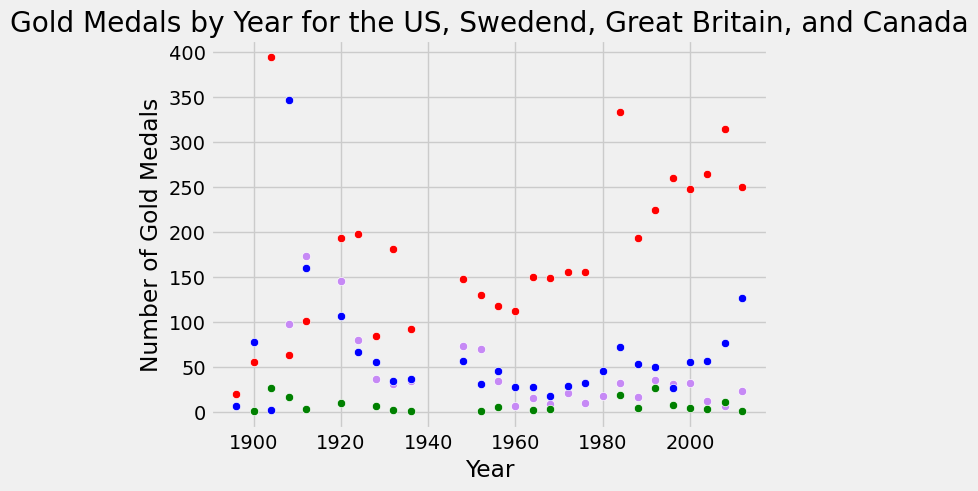

In [34]:
# Let's compare Countries
medalsGold = resultsdf[(resultsdf.Country == 'USA') |
                       (resultsdf.Country == 'SWE') |
                       (resultsdf.Country == 'GBR') |
                       (resultsdf.Country == 'CAN') &
                       (resultsdf.Medal == 'Gold')]

# Group the data
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group by Year and Country
medalsYrCountry = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot to show Gold Medals by Country
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create a scatter plot (different syntax for Seaborn)
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='USA'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='SWE'], x='Year', y='Gold Medals', color='#c689f5')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='GBR'], x='Year', y='Gold Medals', color='blue')
sns.scatterplot(data=medalsByYrCountry[medalsByYrCountry['Country']=='CAN'], x='Year', y='Gold Medals', color='green')

# Select a Seaborn style theme
plt.style.use('fivethirtyeight')

# Display the scatterplot
plt.title('Gold Medals by Year for the US, Swedend, Great Britain, and Canada')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()

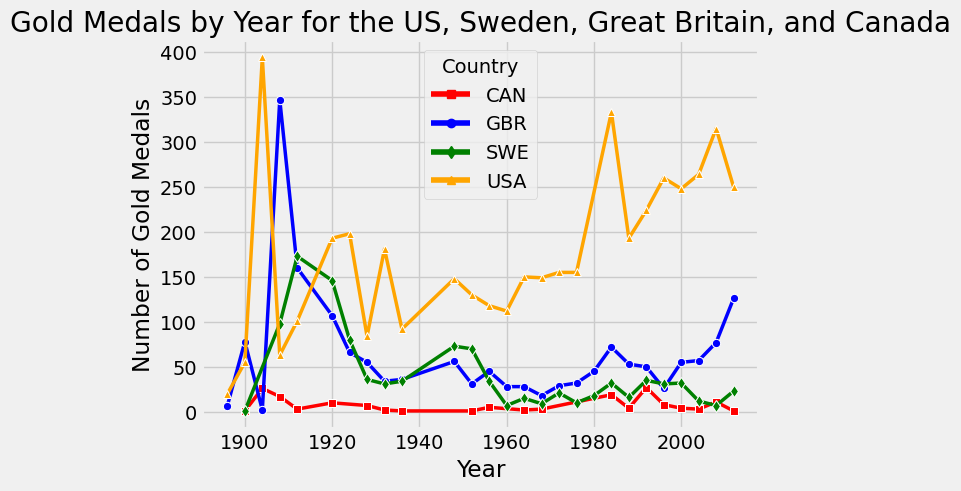

In [37]:
# Let's compare Countries
medalsGold = resultsdf[(resultsdf.Country == 'USA') |
                       (resultsdf.Country == 'SWE') |
                       (resultsdf.Country == 'GBR') |
                       (resultsdf.Country == 'CAN') &
                       (resultsdf.Medal == 'Gold')]

# Group the data
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group by Year and Country
medalsYrCountry = medalsGold.groupby('Year')['Medal'].count()

# Create a pivot to show Gold Medals by Country
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')


# Select a Seaborn style theme
plt.style.use('fivethirtyeight')

# Create a line plot using Seaborn
sns.lineplot(data=medalsPivot, dashes=False, linewidth=2.5, palette=['red', 'blue', 'green', 'orange'], markers=['s', 'o', 'd', '^'])

# Display the lineplot
plt.title('Gold Medals by Year for the US, Sweden, Great Britain, and Canada')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()

## List Seaborn data sets

In [38]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [39]:
dfCars = sns.load_dataset('car_crashes')

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Histogram

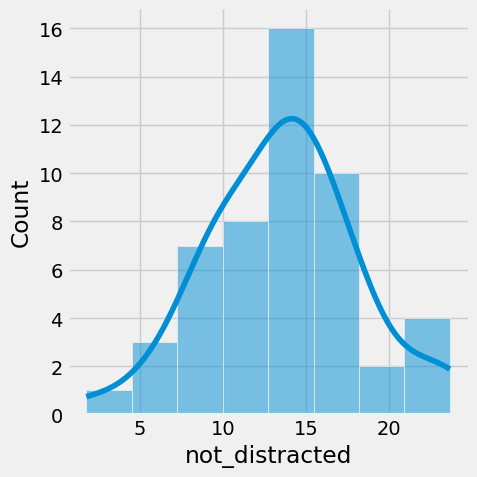

In [41]:
sns.displot(dfCars['not_distracted'], kde=True)

## Joint Plot

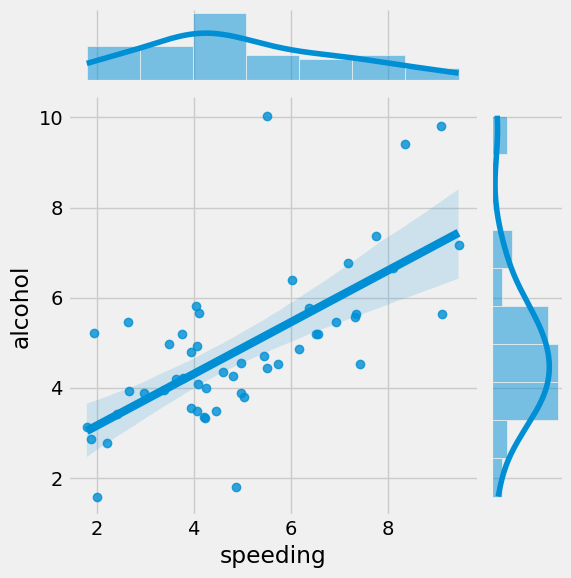

In [42]:
sns.jointplot(x='speeding', y='alcohol', data=dfCars, kind='reg')

## Pair Plot

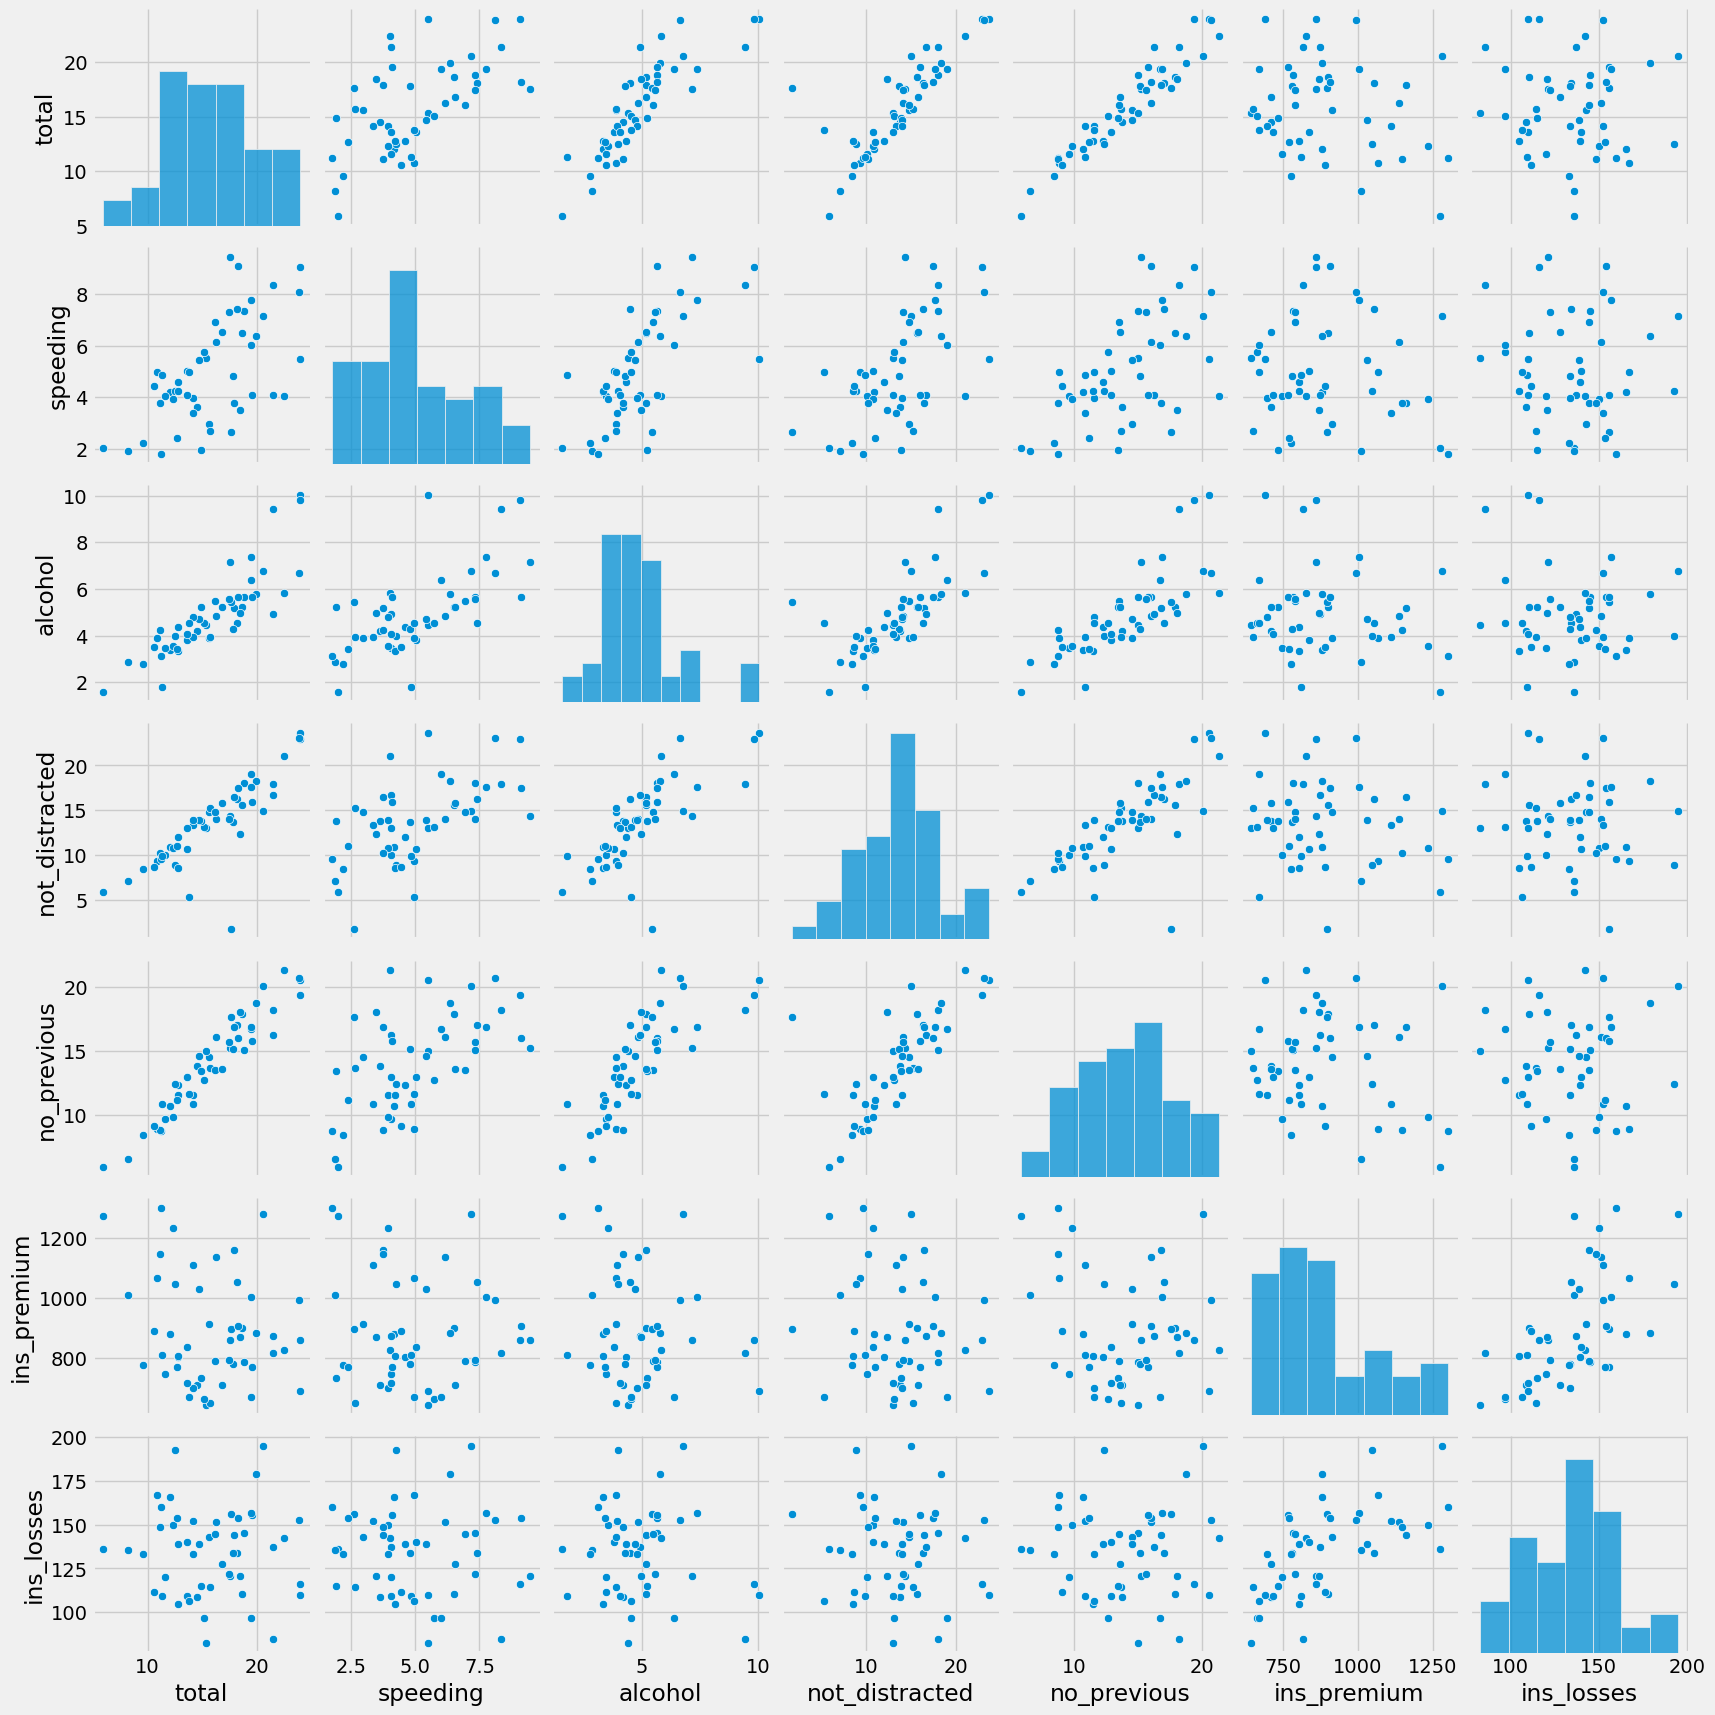

In [43]:
sns.pairplot(dfCars)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


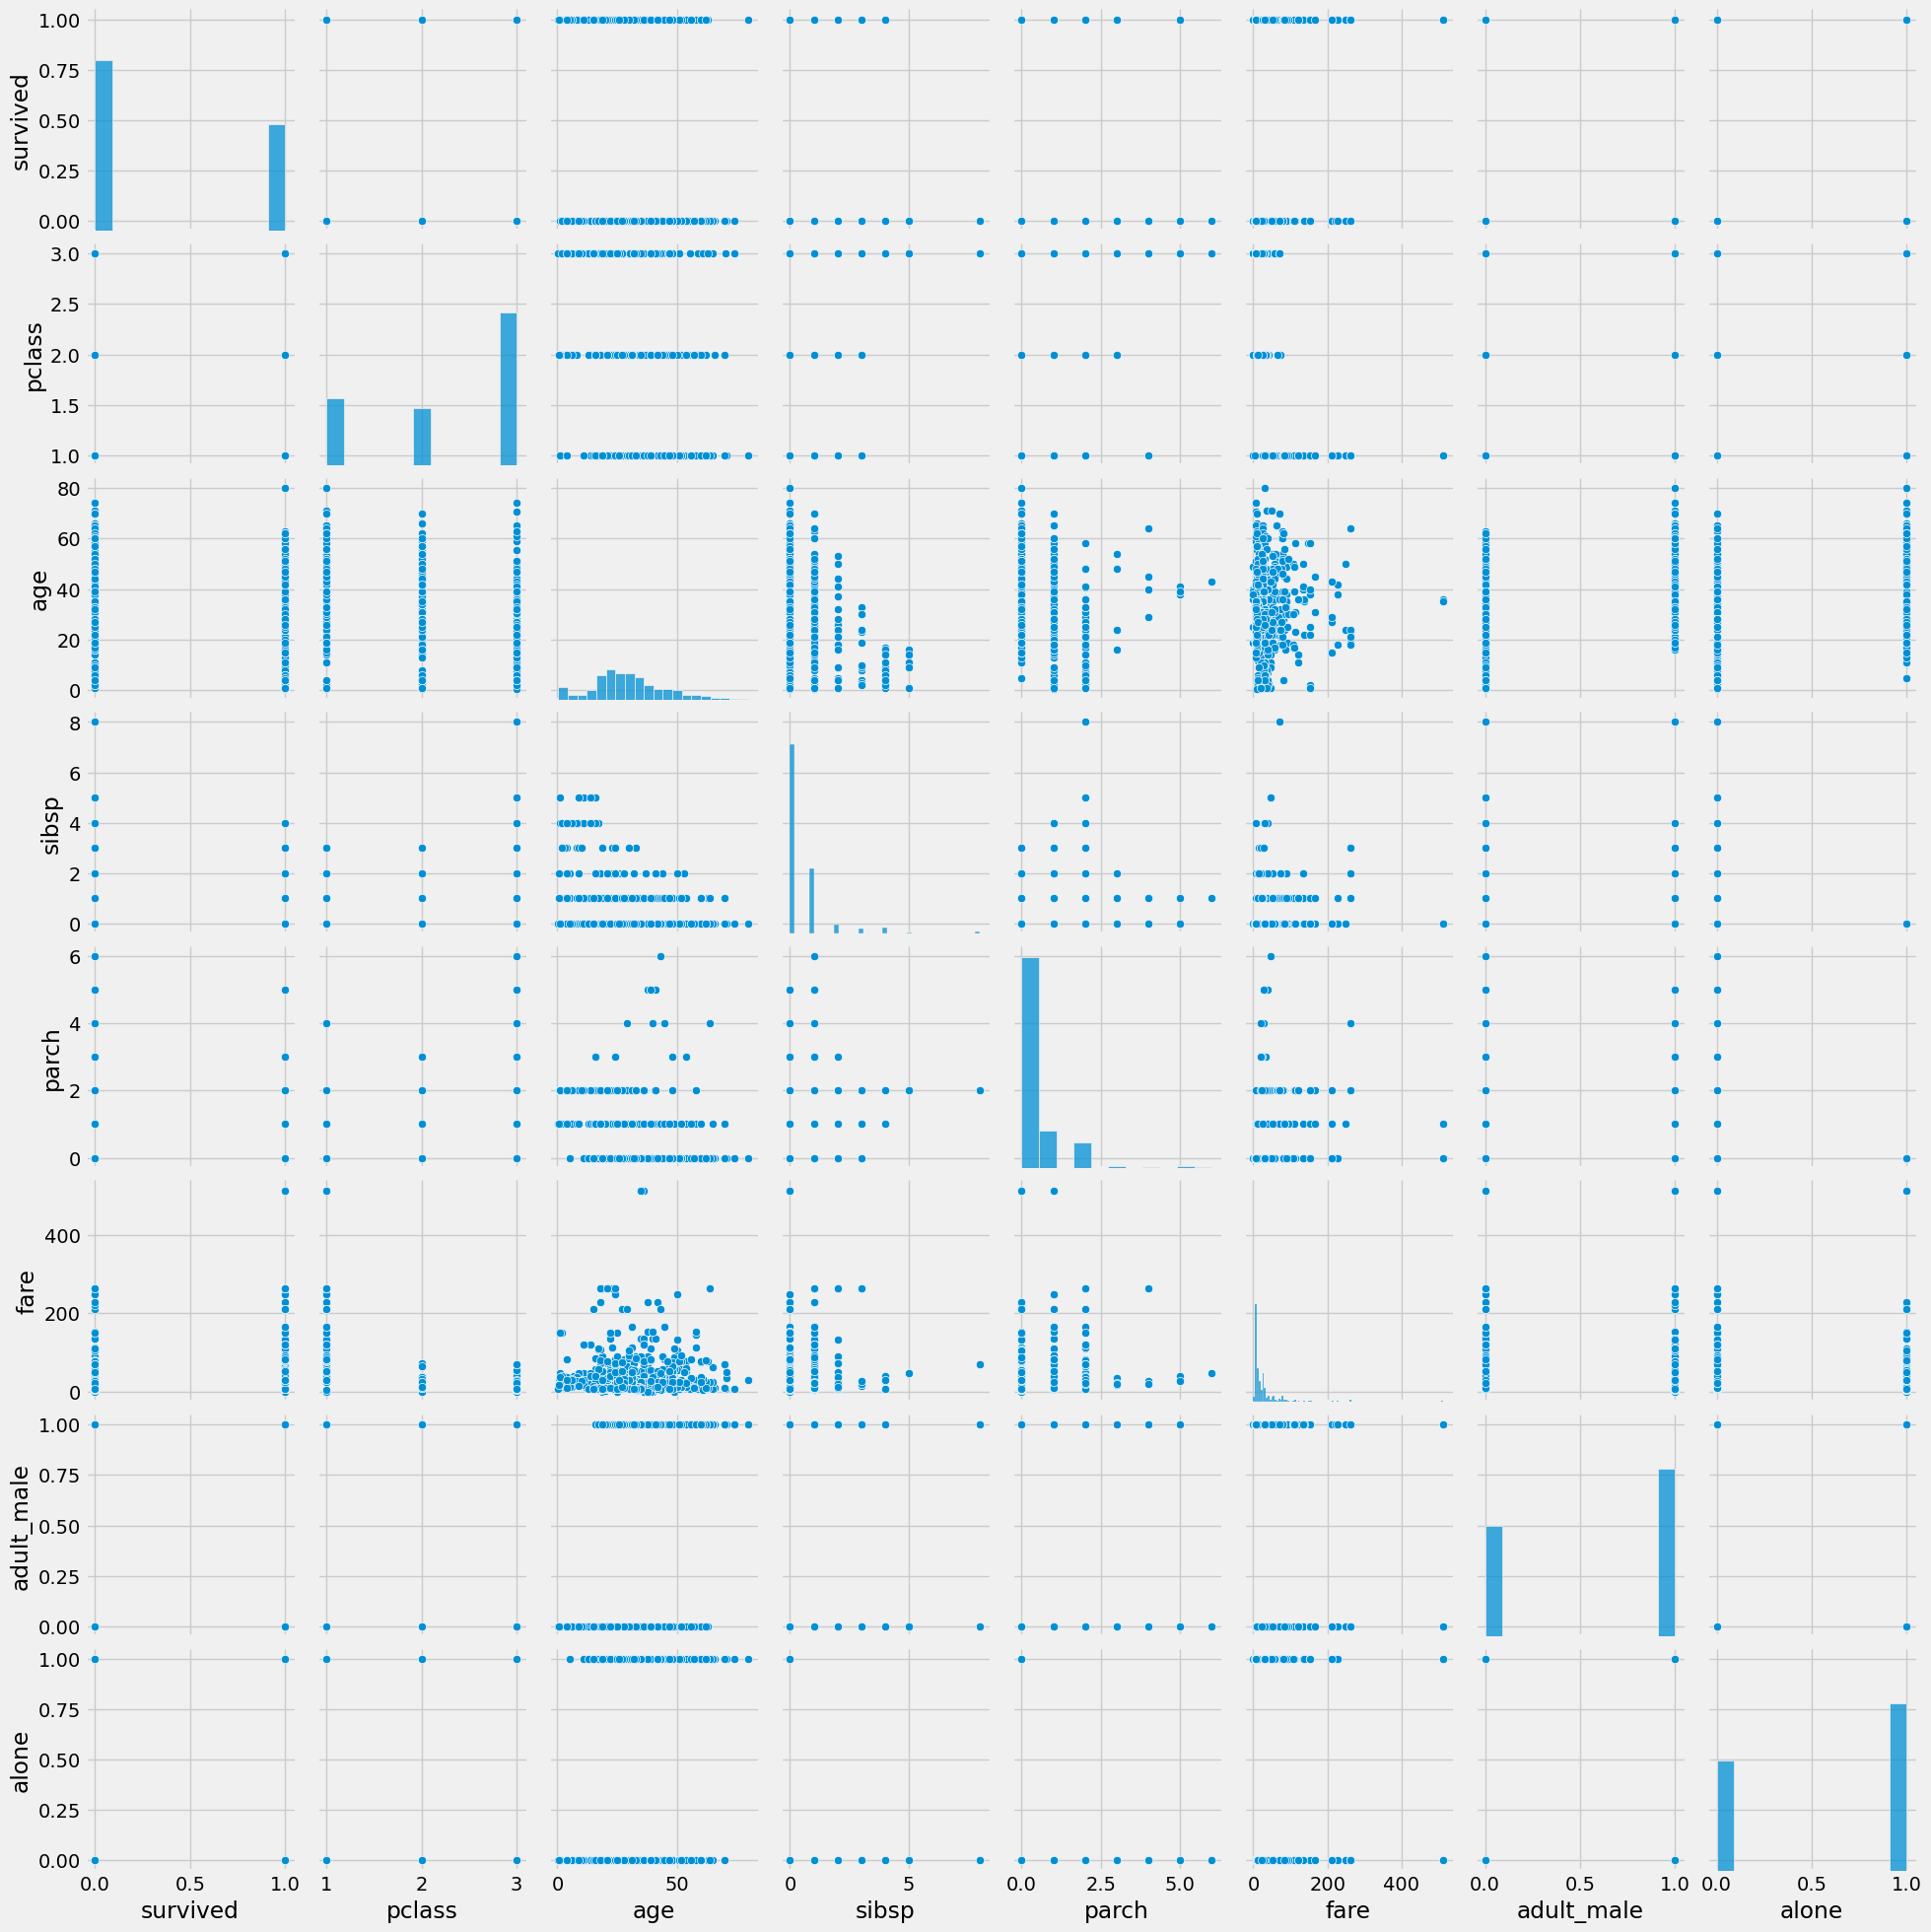

In [44]:
dfTitanic = sns.load_dataset('titanic')

sns.pairplot(dfTitanic)